In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from interpolazione import Interpolazione, final_val

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'RLC sottosmorzato.csv'
fr = pd.read_csv(FILE)

In [2]:
t = np.array(fr['t (us)']) * 10**-6
V = np.array(fr['V (mV)']) * 10**-3
sigmaV =np.sqrt((V * 0.01)**2 + (0.04 / np.sqrt(12))**2) # 0.04 / np.sqrt(12)

In [3]:
def VR_sottosmorzato(t,V0,γ,β):
    return V0*np.exp(-γ*t)*np.sin(β*t)

In [4]:
C =  104.7* 10**-9 # F
sigmaC = 1.1 * 10**-9 # F

R = 60 + 58.5# TODO: capire l'incertezza sul valore di questa resistenza
sigmaR = 0.01 * R # Ohm

L = 88.8 * 10**-3 #Hr
sigmaL = 0.9* 10**-3 #Hr

# VALORI ATTESI: # TODO: verificare che siano giusti propagazione errori
w2 = 1 / (L*C)
sigmaw2 = np.abs(1/(L*C))*np.sqrt((sigmaL/L)**2 + (sigmaC/C)**2)

γ = R / (2*L)
dγ_dR = 1 / (2 * L)
dγ_dL = -R / (2 * L**2)
sigmaγ = np.sqrt((dγ_dR * sigmaR)**2 + (dγ_dL * sigmaL)**2)

β = np.sqrt(w2 - γ**2)
dβ_dw = 0.5 / np.sqrt(w2 - γ**2)
dβ_dγ = -γ / np.sqrt(w2 - γ**2)
sigmaβ = np.sqrt((dβ_dw * sigmaw2)**2 + (dβ_dγ * sigmaγ)**2)

print('---------------- EXPECTED VALUES ----------------')
print('w2 =', final_val(w2, sigmaw2,exp=7,decimals=3))
print('γ =', final_val(γ, sigmaγ,exp=2,decimals=3))
print('β =', final_val(β, sigmaβ,exp=2,decimals=3))

---------------- EXPECTED VALUES ----------------
w2 = (10.756 ± 0.157)e7 
γ = (6.672 ± 0.095)e2 
β = (103.495 ± 0.759)e2 


   
Parameters: [5.05427592e-01 1.05276277e+03 1.07545385e+04] 
Sigma parameters: [3.03333306e-03 1.16515633e+01 9.42944226e+00]

sigmaY: [0.01154857 0.01157069 0.01160919 0.01168646 0.01173641 0.0118361
 0.0119056  0.0120093  0.01209518 0.01215621 0.0122533  0.01228712
 0.01232166 0.01235691 0.01235691 0.01232166 0.01228712 0.0122533
 0.01218784 0.01203716 0.01188164 0.01171893 0.01158203 0.0115509
 0.01159023 0.01165733 0.01175472 0.0118361  0.01188164 0.01193035
 0.01193035 0.01195589 0.01195589 0.01195589 0.01193035 0.0119056
 0.01188164 0.0118361  0.01177384 0.01168646 0.01161995 0.01156258
 0.01154874 0.01159023 0.01164403 0.01170228 0.01171893 0.01175472
 0.01177384 0.01175472 0.01179378 0.01179378 0.01179378 0.01179378
 0.01177384 0.01175472 0.01173641 0.01171893 0.01168646 0.01165733
 0.01161995 0.01156258 0.01154701 0.01154857 0.01157469 0.01159928
 0.01163157 0.01164403 0.01165733 0.01167148 0.01168646 0.01167148
 0.01165733 0.01164403 0.01161995 0.01158203 0.01154744 0.0115

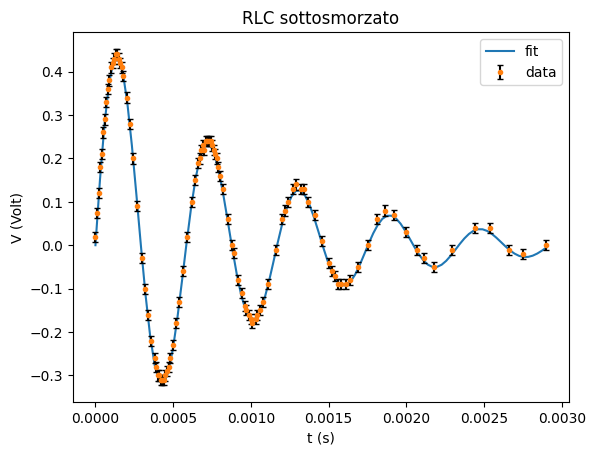

In [5]:
i = Interpolazione(t,V,VR_sottosmorzato,sigmaV,p0=[3.96,γ,β])
print(i)

plt.title('RLC sottosmorzato')
plt.plot(i.x_best,i.y_best,label='fit')
plt.errorbar(t, V, yerr=sigmaV, fmt='.',linestyle='None',ecolor='black',capsize=2,label='data')
plt.xlabel('t (s)')
plt.ylabel('V (Volt)')
plt.legend()
plt.show()

### STIMA VALORI DI GAMMA E W

In [6]:
_,γf,βf = i.bval
_,sigmaγf,sigmaβf = i.sigma_bval

print('---------------- EXPECTED VALUES ----------------')
print('w2 =', final_val(w2, sigmaw2,exp=7,decimals=3))
print('γ =', final_val(γ, sigmaγ,exp=2,decimals=3))
print('β =', final_val(β, sigmaβ,exp=3,decimals=3))

print('---------------- FITTED VALUES ----------------')
print('γ = ',final_val(γf,sigmaγf,decimals=2,exp=3))
print('β = ',final_val(βf,sigmaβf,decimals=3,exp=3))
tγ = np.round(np.abs(γf - γ) / np.sqrt(sigmaγ**2 + sigmaγf**2),3)
tβ = np.round(np.abs(βf - β) / np.sqrt(sigmaβ**2 + sigmaβf**2),3)
print('t (γ) =', tγ)
print('t (β) =', tβ)

---------------- EXPECTED VALUES ----------------
w2 = (10.756 ± 0.157)e7 
γ = (6.672 ± 0.095)e2 
β = (10.35 ± 0.076)e3 
---------------- FITTED VALUES ----------------
γ =  (1.05 ± 0.01)e3 
β =  (10.755 ± 0.009)e3 
t (γ) = 25.645
t (β) = 5.299
